##Import Libraries

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np

##Load Dataset

In [65]:
# Load the dataset into a pandas DataFrame
salary_df = pd.read_csv("/content/drive/MyDrive/salary_data.csv")

##Exploratory Data Analysis

In [66]:
# Display the first 5 rows of the DataFrame to get a preview of the data
salary_df.head()

,EmployeeID,Name,Age,Gender,HighestQualification,JobRole,Department,ExperienceYears,Company,Location,Salary,HireDate,Email,PhoneNumber,PerformanceRating,Industry
0,1001,Christine Wheeler,22,Non-binary,Master's,Accountant,Product Management,0,GlobalBrands Ltd.,"Miami, FL",85502,19-07-2024,christine.wheeler@globalbrandsltd.com,+1-893-964-1075x4822,3,Education
1,1002,Travis Campbell,53,Male,Bachelor's,Financial Analyst,Operations,30,ApexFinance Group,"Bangalore, IND",186248,13-11-2019,travis.campbell@apexfinancegroup.com,(455)791-5678x5804,5,Automotive
2,1003,Justin Thomas,48,Non-binary,Associate's,Research Scientist,Research & Development,10,OmniConnect Inc.,"Bangalore, IND",91933,26-03-2018,justin.thomas@omniconnectinc.com,231-208-0916x1972,3,Consulting
3,1004,Joshua Wall,37,Male,Master's,Accountant,Customer Success,6,OmniConnect Inc.,"Denver, CO",104364,05-01-2024,joshua.wall@omniconnectinc.com,453-817-9149,3,Healthcare
4,1005,Jordan Harvey,55,Non-binary,Bachelor's,Operations Manager,Engineering,3,FutureWorks Co.,"Singapore, SG",96480,12-11-2022,jordan.harvey@futureworksco.com,472.239.2131,3,Finance


In [67]:
# Get concise summary of the DataFrame, including data types and non-null values
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EmployeeID            1000 non-null   int64 
 1   Name                  1000 non-null   object
 2   Age                   1000 non-null   int64 
 3   Gender                1000 non-null   object
 4   HighestQualification  1000 non-null   object
 5   JobRole               1000 non-null   object
 6   Department            1000 non-null   object
 7   ExperienceYears       1000 non-null   int64 
 8   Company               1000 non-null   object
 9   Location              1000 non-null   object
 10  Salary                1000 non-null   int64 
 11  HireDate              1000 non-null   object
 12  Email                 1000 non-null   object
 13  PhoneNumber           1000 non-null   object
 14  PerformanceRating     1000 non-null   int64 
 15  Industry              1000 non-null   o

In [68]:
# Generate descriptive statistics of the numerical columns
salary_df.describe()

,EmployeeID,Age,ExperienceYears,Salary,PerformanceRating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,1500.500000,43.717000,10.863000,135745.34300,3.85400
std,288.819436,12.832131,9.794394,39089.68502,0.98978
min,1001.000000,22.000000,0.000000,50000.00000,1.00000
25%,1250.750000,32.000000,3.000000,105485.25000,3.00000
50%,1500.500000,44.000000,8.000000,132056.00000,4.00000
75%,1750.250000,55.000000,17.000000,166115.50000,5.00000
max,2000.000000,65.000000,40.000000,200000.00000,5.00000


In [69]:
# Drop irrelevant columns for the analysis and model training
# Using inplace=True modifies the DataFrame directly
salary_df.drop(['EmployeeID', 'Name', 'Email', 'PhoneNumber', 'HireDate'], axis=1, inplace=True)

In [70]:
# Check the DataFrame information again after dropping columns
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1000 non-null   int64 
 1   Gender                1000 non-null   object
 2   HighestQualification  1000 non-null   object
 3   JobRole               1000 non-null   object
 4   Department            1000 non-null   object
 5   ExperienceYears       1000 non-null   int64 
 6   Company               1000 non-null   object
 7   Location              1000 non-null   object
 8   Salary                1000 non-null   int64 
 9   PerformanceRating     1000 non-null   int64 
 10  Industry              1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [71]:
# Check for missing values in each column
salary_df.isnull().sum()

,0
Age,0
Gender,0
HighestQualification,0
JobRole,0
Department,0
ExperienceYears,0
Company,0
Location,0
Salary,0
PerformanceRating,0


#Visualization

In [72]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

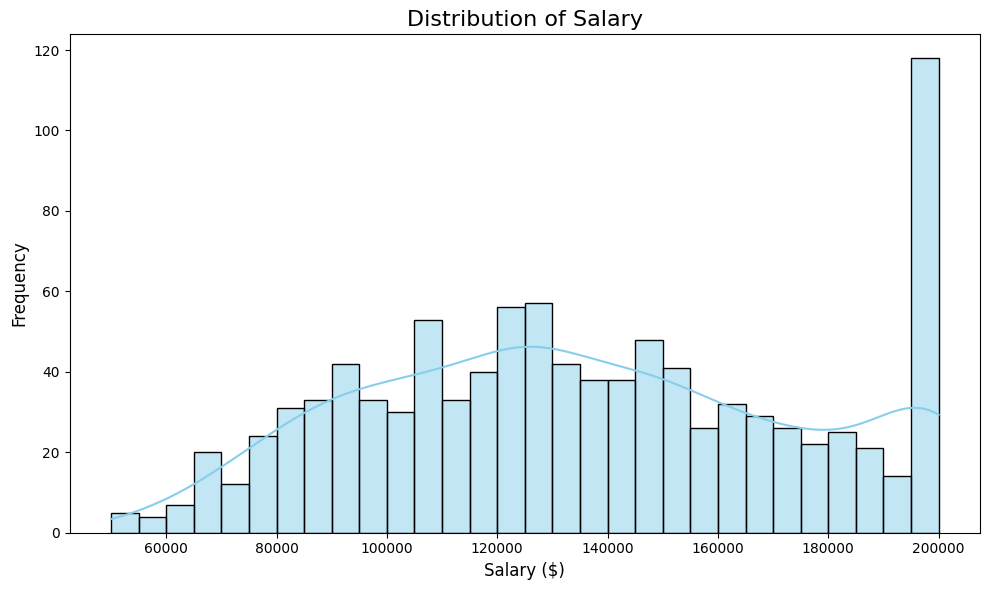

In [73]:
# Plot the distribution of Salary using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='skyblue') # Use original 'data' for salary distribution
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('salary_distribution.png')
plt.show()

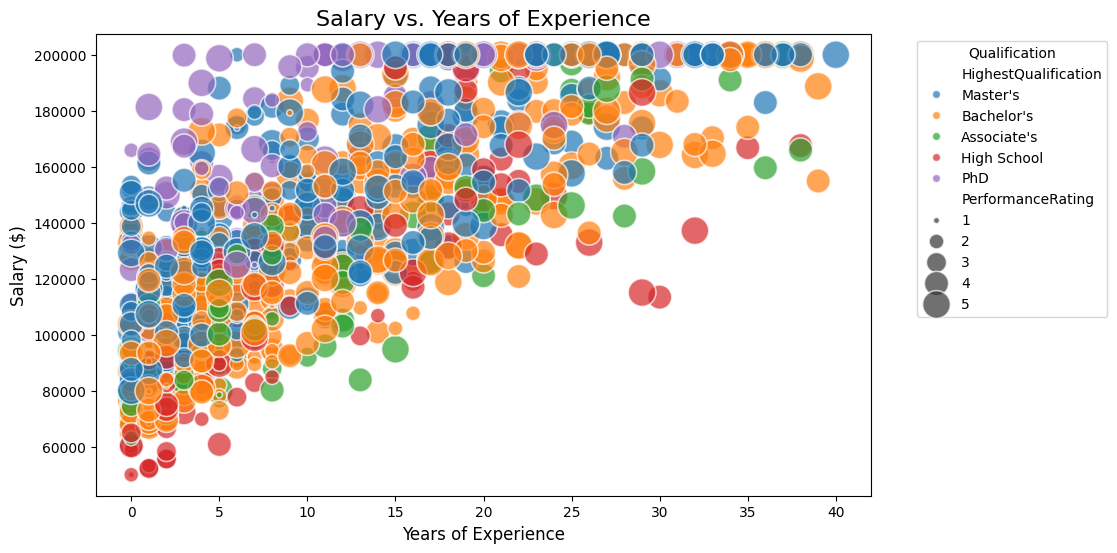

In [74]:
# Salary vs. Years of Experience (Scatter plot)
# Visualize the relationship between ExperienceYears and Salary,
# with hue based on HighestQualification and size based on PerformanceRating.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ExperienceYears', y='Salary', data=data, hue='HighestQualification', size='PerformanceRating', sizes=(20, 400), alpha=0.7, palette='tab10')
plt.title('Salary vs. Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(title='Qualification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipython-input-75-2243268358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Salary', y='Location', data=df_top_locations, order=df_top_locations.groupby('Location')['Salary'].median().sort_values(ascending=False).index, palette='mako')


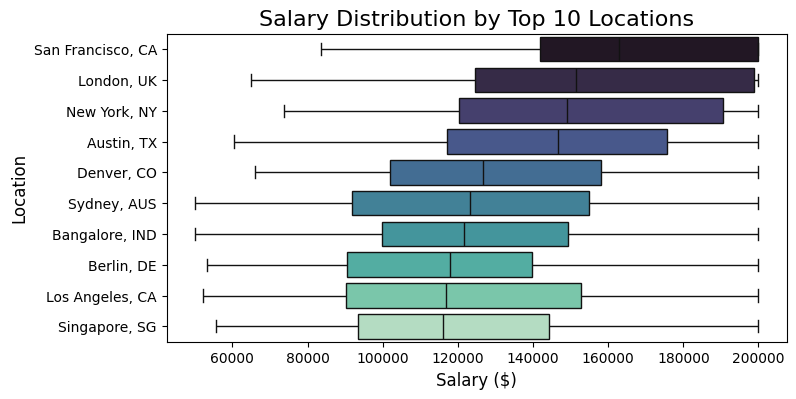

In [75]:
# Salary vs. Location (Box plot - top N locations for readability)
# Analyze salary distribution across the top 10 locations.
top_locations = data['Location'].value_counts().nlargest(10).index
df_top_locations = data[data['Location'].isin(top_locations)]
plt.figure(figsize=(8, 4))
sns.boxplot(x='Salary', y='Location', data=df_top_locations, order=df_top_locations.groupby('Location')['Salary'].median().sort_values(ascending=False).index, palette='mako')
plt.title('Salary Distribution by Top 10 Locations', fontsize=16)
plt.xlabel('Salary ($)', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.show()

## Prepare data for random forest

In [76]:
# Prepare data for random forest
# Encode categorical features using OneHotEncoder and separate features (X) from target (y).

from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = salary_df.select_dtypes(include='object').columns

# Initialize and fit OneHotEncoder to categorical columns
# handle_unknown='ignore' prevents errors if unseen categories appear during transform
# sparse_output=False returns a dense numpy array
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(salary_df[categorical_cols])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Identify numerical columns
numerical_cols = salary_df.select_dtypes(include=np.number).columns
# Create a DataFrame for numerical columns and reset index for proper concatenation
numerical_df = salary_df[numerical_cols].reset_index(drop=True)

# Concatenate numerical and encoded categorical features to create the feature set X
X = pd.concat([numerical_df, encoded_df], axis=1)

# Define the target variable y (Salary column from the original data)
# Reset index to ensure alignment with the feature set X
y = data['Salary'].reset_index(drop=True)

# Display the first few rows of the feature set (X) and target variable (y)
display(X.head())
display(y.head())

,Age,ExperienceYears,Salary,PerformanceRating,Gender_Female,Gender_Male,Gender_Non-binary,HighestQualification_Associate's,HighestQualification_Bachelor's,HighestQualification_High School,...,Industry_Automotive,Industry_Biotechnology,Industry_Consulting,Industry_Education,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Media,Industry_Retail,Industry_Technology
0,22,0,85502,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,30,186248,5,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48,10,91933,3,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37,6,104364,3,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,55,3,96480,3,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,Salary
0,85502
1,186248
2,91933
3,104364
4,96480


## Split data

In [77]:
# Split the data into training and testing sets
# Use train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split

# Split data: 80% for training, 20% for testing
# random_state for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 73)
X_test shape: (200, 73)
y_train shape: (800,)
y_test shape: (200,)


## Train random forest model

In [78]:
# Train a Random Forest Regressor model on the training data

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# random_state for reproducibility of the model training results
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate model


In [79]:
# Evaluate the trained model's performance

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 85575.46091000024
R-squared (R2) Score: 0.9999436782987218
